(60, 160, 3)


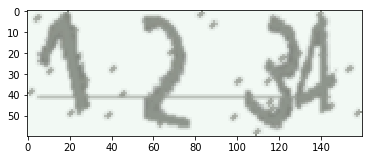

In [1]:
#############   generate data   ################
from captcha.image import ImageCaptcha
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

text = '1234'
image = ImageCaptcha()
captcha = image.generate(text)
captcha_image = Image.open(captcha)
#captcha_image.show()
plt.imshow(captcha_image)
print(np.array(captcha_image).shape)

In [4]:
VOCAB = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
CAPTCHA_LENGTH = 4
VOCAB_LENGTH = len(VOCAB)

In [5]:
from captcha.image import ImageCaptcha
import numpy as np

In [6]:
def generate_captcha(captcha_text):
    '''
    get captcha text
    return np array of captcha image
    '''
    image = ImageCaptcha()
    captcha = image.generate(captcha_text)
    captcha_image = Image.open(captcha)
#     captcha_image = image_deal(captcha_image)
    a = np.array(captcha_image)
    
    a_0 = list(a[:,:,0])
    a_1 = list(a[:,:,1])
    a_2 = list(a[:,:,2])
    a_ = []
    a_.append(a_0)
    a_.append(a_1)
    a_.append(a_2)
    a_ = np.array(a_)
    return a_

In [7]:
def text2vec(text):
    '''
    text to vector
    :param text: source text
    :return: np array
    '''
    if len(text) > CAPTCHA_LENGTH:
        return False
    
    vector = np.zeros(CAPTCHA_LENGTH * VOCAB_LENGTH)
    
    for i, c in enumerate(text):
        index = i * VOCAB_LENGTH + VOCAB.index(c)
        vector[index] = 1
    return vector

def vec2text(vector):
    '''
    vector to text
    :param text: source vector
    :return: text'''
    if len(vector) != 40:
        return False
    
    if not isinstance(vector, np.ndarray):
        vector = np.asarray(vector)
    
    text = ''
    
    for i in range(0,4):
        text += VOCAB[np.argmax(vector[i*10:(i+1)*10])]
    
    return text

t = '0234'
print(vec2text(text2vec(t)))

0234


In [8]:
import random
from os.path import join, exists
import pickle
import numpy as np
from os import makedirs

DATA_LENGTH = 1000
DATA_PATH = 'data'

def get_random_text():
    text = ''
    for i in range(CAPTCHA_LENGTH):
        text += random.choice(VOCAB)
    return text

In [9]:
def generate_data():
    print('Generating Data...')
    data_x, data_y = [], []

    # generate data x and y
    for i in range(DATA_LENGTH):
        text = get_random_text()
        # get captcha array
        captcha_array = generate_captcha(text)
        # get vector
        vector = text2vec(text)
        data_x.append(captcha_array)
        data_y.append(vector)

    # write data to pickle
    if not exists(DATA_PATH):
        makedirs(DATA_PATH)

    x = np.asarray(data_x, np.float32)
    y = np.asarray(data_y, np.float32)
    with open(join(DATA_PATH, 'data.pkl'), 'wb') as f:
        pickle.dump(x, f)
        pickle.dump(y, f)
        

In [10]:
generate_data()
with open(join(DATA_PATH,'data.pkl'), 'rb') as f:
    data_x = pickle.load(f)
    data_y = pickle.load(f)

Generating Data...


In [11]:
from sklearn.cross_validation import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.4, random_state=40)
print(train_x.shape)

(600, 3, 60, 160)


/home/lsc/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torch

class CaptchaDataset(Dataset):
    def __init__(self, x, y, transform=None):
        super(Dataset, self).__init__()
        self.x = x
        self.y = y
        self.transform = transform
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, n):
#         self.x[n] = image_deal(self.x[n])
#         self.y[n] = image_deal(self.y[n])
#         self.x[n] = self.x[n][np.newaxis,:,:]
        return self.x[n], self.y[n]

In [ ]:
from torchvision import transforms

captcha_train_dataset = CaptchaDataset(train_x, train_y, transform=transforms.ToTensor())
captcha_test_dataset = CaptchaDataset(test_x, test_y, transform=transforms.ToTensor())
train_data = DataLoader(captcha_train_dataset, batch_size=100, shuffle=True)
test_data = DataLoader(captcha_test_dataset, batch_size=100, shuffle=False)